In [1]:
import sys
sys.path.append('../')
import numpy as np
from GroupingAlgorithm import *
from HEEM_VQE_Functions import *
from utils import get_backend_conectivity, BeH2, LiH, H2
from qiskit.opflow.primitive_ops import Z2Symmetries
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.algorithms import GroundStateEigensolver
from time import time
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [2]:
# molecule = H2 
# distances = np.linspace(0.2,4,16)

molecule = LiH 
distances = np.linspace(0.4,5,16)

# molecule = BeH2
# distances = np.linspace(0.5,5,16)

In [3]:
opt = molecule(operator=True)
opt.num_qubits

4

In [4]:
converter, problem = molecule(operator=False)
calc = GroundStateEigensolver( converter, NumPyMinimumEigensolver() )
res = calc.solve(problem)
res.total_energies

array([-7.88146143+0.j])

In [5]:
def GroundStateEigensolver_loop( d ):
    converter, problem = molecule( d, operator=False )
    calc = GroundStateEigensolver( converter, NumPyMinimumEigensolver() )
    res = calc.solve(problem)
    return res.total_energies 

In [6]:
energies = Parallel(n_jobs=-1)( delayed(GroundStateEigensolver_loop)(d) for d in distances )

C:\Users\lucia\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-8.0, -7.0)

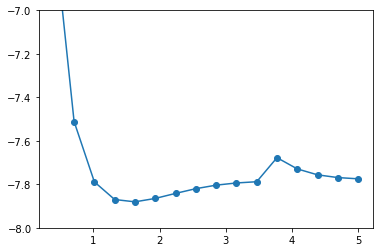

In [7]:
plt.plot( distances, energies, '-o' )
plt.ylim([-8,-7])